# DATA ANALYTICS INTERN @ TECH-A-INTERN

### AUTHOR : PARVEJ ALAM M. ANSARI

# TASK 2 : Sports Data Analysis

### The dataset is available at Kaggle : 
### https://www.kaggle.com/datasets/mukeshmanral/fifa-data-for-eda-and-stats

![Fifa_2021](https://www.internetmatters.org/wp-content/uploads/2021/05/FIFA-2021-image-1200-630.png)

## <a id="2">1. Import Required Libraries:</a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(rc={'figure.figsize': [15, 8]}, font_scale=1.2) # Standard figure size for all

## <a id="2">2. Exploratory Data Analysis:</a>

In [3]:
# load dataset:
df = pd.read_csv('fifa_eda_stats.csv',index_col=0,na_values=True)

In [4]:
# check first five rows:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
# check shape of dataset:
df.shape

(18207, 56)

In [6]:
# check name of columns:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [7]:
# check datatpes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Preferred Foot            18159 non-null  object 
 9   International Reputation  1627 non-null   float64
 10  Weak Foot                 18001 non-null  float64
 11  Skill Moves               16133 non-null  float64
 12  Work Rate                 18159 non-null  object 
 13  Body Type                 18159 non-null  object 
 14  

In [8]:
# check duplicate values in dataset:
df.duplicated().sum()

0

In [9]:
# check null values in dataset:
df.isna().sum()

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation    16580
Weak Foot                     206
Skill Moves                  2074
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                 626
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy                     48
LongPassing   

### Drop **unnecessary** columns:

In [10]:
# drop unnecessary columns:
df.drop(columns=['International Reputation','Jersey Number','Loaned From','Weight'],axis=1,inplace=True)

In [12]:
# Check for numerical columns
numerical_columns = df.select_dtypes(include=['number'])
print("Numerical Columns:")
print(numerical_columns.columns)

Numerical Columns:
Index(['Age', 'Overall', 'Potential', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')


In [13]:
# Check for categorical columns
categorical_columns = df.select_dtypes(exclude=['number'])
print("\nCategorical Columns:")
print(categorical_columns.columns)


Categorical Columns:
Index(['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Position', 'Joined', 'Contract Valid Until',
       'Height', 'Release Clause'],
      dtype='object')


## <a id="2">3. Feature Engineering:</a>

### Fill nan values in float colunms with median 36 column in one code line:

In [14]:
df.fillna(df.median(),inplace=True)

/tmp/ipykernel_62596/1048787520.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(),inplace=True)


### Handling the object columns by fillna values with mode 9 columns

In [15]:
for col in df.columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [16]:
# check null values again:
df.isna().sum()

Name                    0
Age                     0
Nationality             0
Overall                 0
Potential               0
Club                    0
Value                   0
Wage                    0
Preferred Foot          0
Weak Foot               0
Skill Moves             0
Work Rate               0
Body Type               0
Position                0
Joined                  0
Contract Valid Until    0
Height                  0
Crossing                0
Finishing               0
HeadingAccuracy         0
ShortPassing            0
Volleys                 0
Dribbling               0
Curve                   0
FKAccuracy              0
LongPassing             0
BallControl             0
Acceleration            0
SprintSpeed             0
Agility                 0
Reactions               0
Balance                 0
ShotPower               0
Jumping                 0
Stamina                 0
Strength                0
LongShots               0
Aggression              0
Interception

In [17]:
# check datatypes for each column again:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  18207 non-null  object 
 1   Age                   18207 non-null  int64  
 2   Nationality           18207 non-null  object 
 3   Overall               18207 non-null  int64  
 4   Potential             18207 non-null  int64  
 5   Club                  18207 non-null  object 
 6   Value                 18207 non-null  object 
 7   Wage                  18207 non-null  object 
 8   Preferred Foot        18207 non-null  object 
 9   Weak Foot             18207 non-null  float64
 10  Skill Moves           18207 non-null  float64
 11  Work Rate             18207 non-null  object 
 12  Body Type             18207 non-null  object 
 13  Position              18207 non-null  object 
 14  Joined                18207 non-null  object 
 15  Contract Vali

In [19]:
# Summary statistics for numerical data
numerical_summary = numerical_columns.describe()
print("Numerical Data Summary:")
numerical_summary.head()

Numerical Data Summary:


,Age,Overall,Potential,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18001.000000,16133.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18132.000000,18132.000000,18131.000000,18131.000000,18132.000000
mean,25.122206,66.238699,71.307299,2.964391,2.532263,49.734181,45.550911,52.298144,58.686712,42.909026,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.639477,16.414516,16.255584,16.412663,16.734282
std,4.669943,6.908930,6.136496,0.637538,0.617762,18.364524,19.525820,17.379909,14.699495,17.694408,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.698248,16.909040,16.504735,17.037071,17.958236
min,16.000000,46.000000,48.000000,2.000000,2.000000,5.000000,2.000000,4.000000,7.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,21.000000,62.000000,67.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [20]:
# Summary statistics for categorical data
categorical_summary = categorical_columns.describe(include='all')
print("\nCategorical Data Summary:")
categorical_summary.head()


Categorical Data Summary:


,Name,Nationality,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Release Clause
count,18207,18207,17966,18207,18207,18159,18159,18159,18147,16654,17918,18159,16643
unique,17194,164,651,217,144,2,9,10,27,1736,36,21,1244
top,J. Rodríguez,England,FC Barcelona,€1.1M,€1K,Right,Medium/ Medium,Normal,ST,"Jul 1, 2018",2019,6'0,€1.1M
freq,11,1662,33,431,4900,13948,9810,10595,2152,1538,4819,2881,557


### Preprocessing or Cleaning 'Value' and 'Wage' Columns:

In [21]:
df['Value'] = df['Value'].apply(lambda x:x.split('€')[1])
df['Value']=df['Value'].replace({'K': '000', 'M': '000000'}, regex=True)
df['Value']=pd.to_numeric(df['Value'],errors='coerce')
df['Value']=df['Value'].astype(int)
df['Value'].head()

ID
158023          110
20801      77000000
190871          118
193080     72000000
192985    102000000
Name: Value, dtype: int64

In [22]:
df['Wage']=df['Wage'].apply(lambda x:x.split('€')[1])
df['Wage']=df['Wage'].replace({'K': '000', 'M': '000000'}, regex=True)
df['Wage']=pd.to_numeric(df['Value'],errors='coerce')
df['Wage']=df['Wage'].astype(int)
df['Wage'].head()

ID
158023          110
20801      77000000
190871          118
193080     72000000
192985    102000000
Name: Wage, dtype: int64

### Convert 'Joined' column to required date-time format:

In [23]:
# checking column before cleaning:
df['Joined'].head()

ID
158023     Jul 1, 2004
20801     Jul 10, 2018
190871     Aug 3, 2017
193080     Jul 1, 2011
192985    Aug 30, 2015
Name: Joined, dtype: object

In [24]:
df['Joined'] = pd.to_datetime(df['Joined'])
df['joined_month'] = df['Joined'].dt.month
df['Joined_year'] = df['Joined'].dt.year

In [25]:
# checking column after cleaning:
df['Joined'].head()

ID
158023   2004-07-01
20801    2018-07-10
190871   2017-08-03
193080   2011-07-01
192985   2015-08-30
Name: Joined, dtype: datetime64[ns]

### Converting 'Height' column from feet to meter:

In [26]:
# checking column before cleaning:
df['Height'].head()

ID
158023     5'7
20801      6'2
190871     5'9
193080     6'4
192985    5'11
Name: Height, dtype: object

In [27]:
df['Height_n1']=df['Height'].apply(lambda x:x.split("'")[0])

In [28]:
df['Height_n2']=df['Height'].apply(lambda x:x.split("'")[1])

In [29]:
df['Height_n1'].head()

ID
158023    5
20801     6
190871    5
193080    6
192985    5
Name: Height_n1, dtype: object

In [30]:
df['Height_n1']=pd.to_numeric(df['Height_n1'],errors='coerce')
df['Height_n2']=pd.to_numeric(df['Height_n2'],errors='coerce')
df['Height_m']=(df['Height_n1']* 0.3048)+(df['Height_n2']*0.0254)
df.drop(columns=['Height','Height_n1','Height_n2'],axis=1,inplace=True)

In [31]:
# checking column after cleaning:
df['Height_m'].head()

ID
158023    1.7018
20801     1.8796
190871    1.7526
193080    1.9304
192985    1.8034
Name: Height_m, dtype: float64

### Now, cleaning 'Release Clause' column:

In [32]:
# checking column before cleaning:
df['Release Clause'].head()

ID
158023    €226.5M
20801     €127.1M
190871    €228.1M
193080    €138.6M
192985    €196.4M
Name: Release Clause, dtype: object

In [33]:
df['Release Clause'] = df['Release Clause'].apply(lambda x:x.split('€')[1])

In [34]:
df['Release Clause'] = df['Release Clause'].replace({'K': '000', 'M': '000000'}, regex=True)

In [35]:
# checking column after cleaning::
df['Release Clause'].head()

ID
158023    226.5000000
20801     127.1000000
190871    228.1000000
193080    138.6000000
192985    196.4000000
Name: Release Clause, dtype: object

### Calculate the total payment for each player (Release Clause + Wage) :

In [36]:
df['Release Clause'] = pd.to_numeric(df['Release Clause'],errors='coerce')

In [37]:
df['total_payment'] = df['Wage'] + df['Release Clause']

In [38]:
df['total_payment'] = df['total_payment'].astype(int)

In [39]:
df['total_payment'].head()

ID
158023          336
20801      77000127
190871          346
193080     72000138
192985    102000196
Name: total_payment, dtype: int64

## <a id="2">4. Data Visualization:</a>

### 1 - What is the distribution of the players **AGE** ?

/tmp/ipykernel_62596/2870075892.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'],shade=True,color='r')


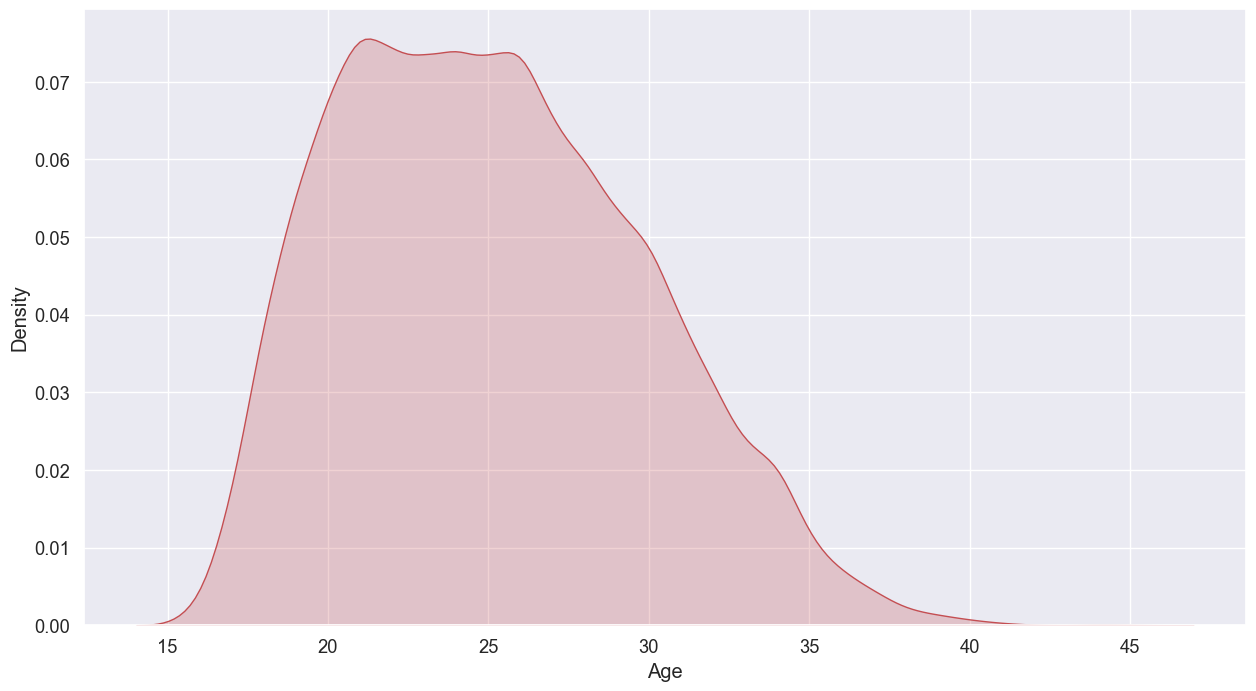

In [40]:
sns.kdeplot(df['Age'],shade=True,color='r')
plt.show()

### 2 - What is the range of ***Overall*** evaluation for the football players ?

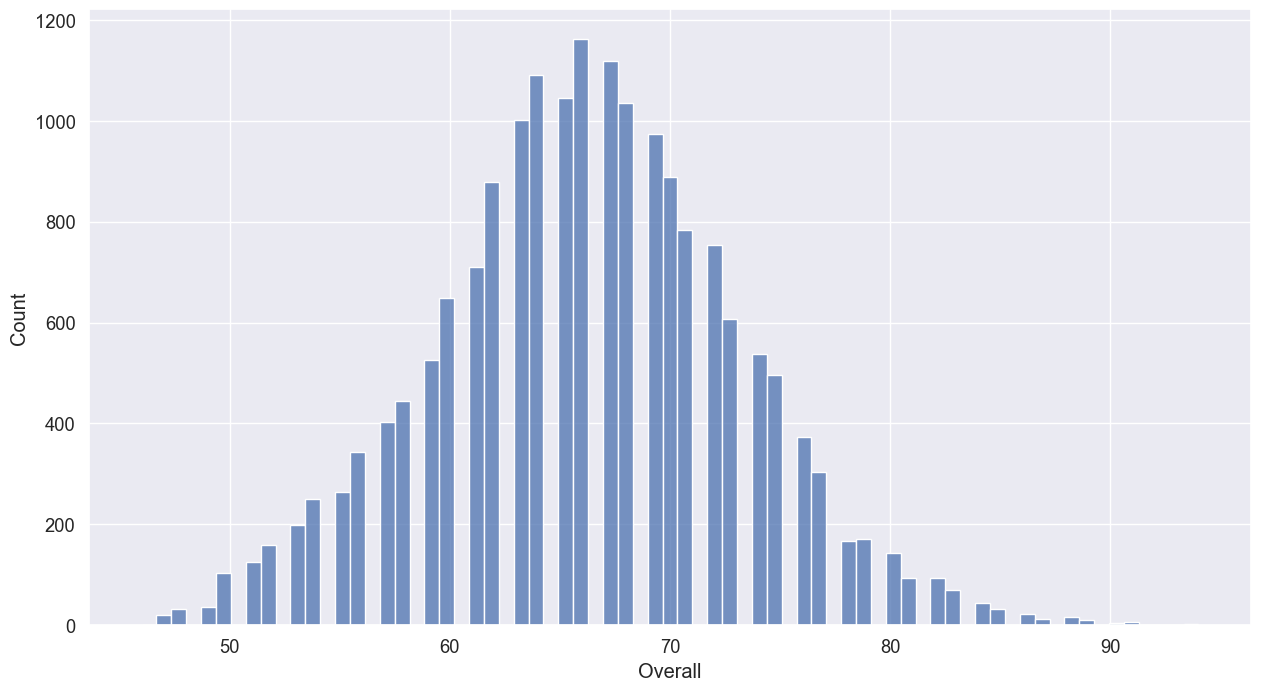

In [41]:
sns.histplot(df['Overall'])
plt.show()

### 3 - How many players in each **Position**? 

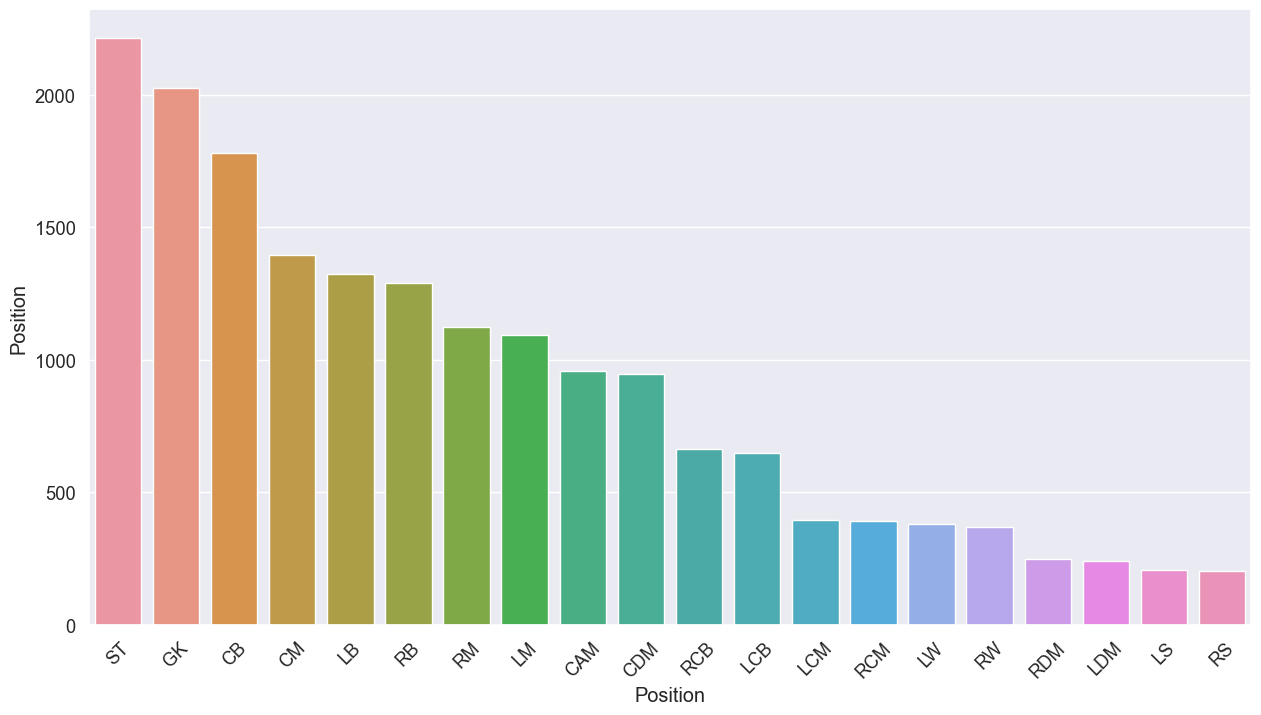

In [44]:
c = pd.DataFrame(df.groupby("Position")['Position'].count().sort_values(ascending=False).head(20))
sns.barplot(data = c, x=c.index , y='Position')
plt.xticks(rotation = 45);
plt.show()

### 4 - Number of players evaluated by there **Work Rate** ??

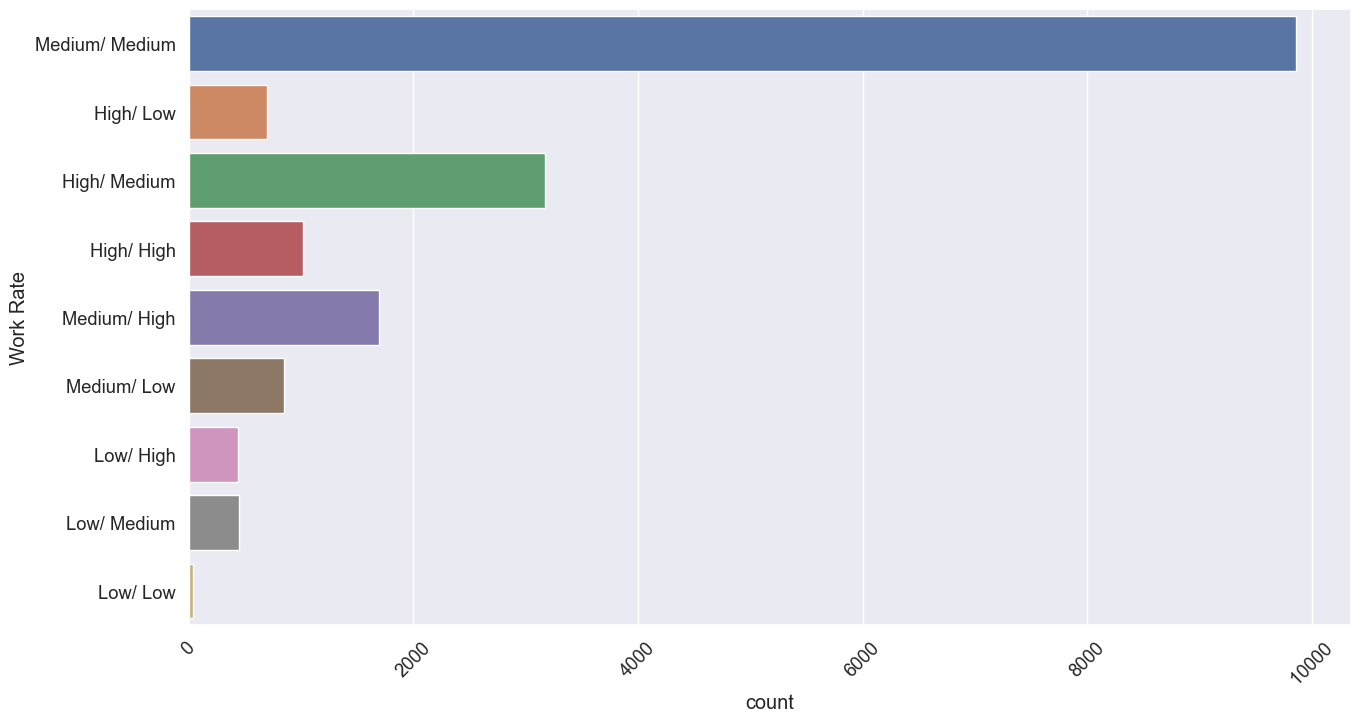

In [45]:
sns.countplot(data=df,y='Work Rate')
plt.xticks(rotation=45)
plt.show()

### 5 - What is the distrbution of the  average **Age** of the players **Strength**?

/tmp/ipykernel_62596/234610341.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_a)


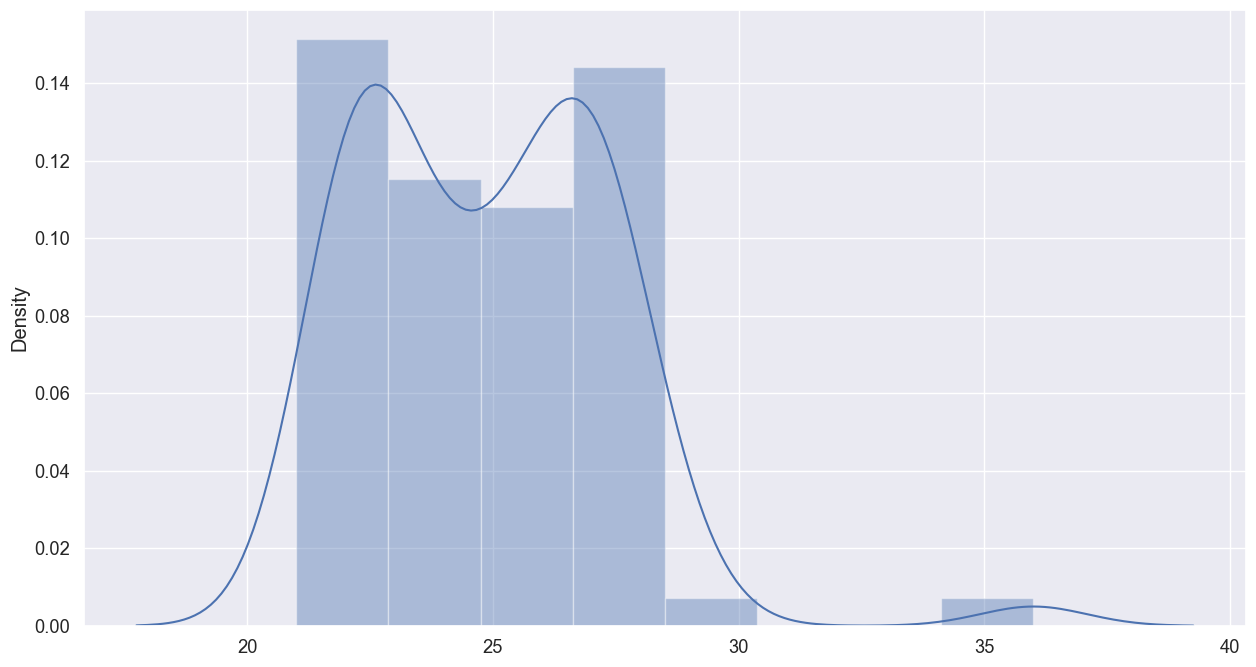

In [46]:
s_a = df.groupby('Strength')[['Age']].mean()
sns.distplot(s_a)
plt.show()

### 6 - What is the relation between the **Value** the fifa put for the player and **Wage** the players take in fact ?

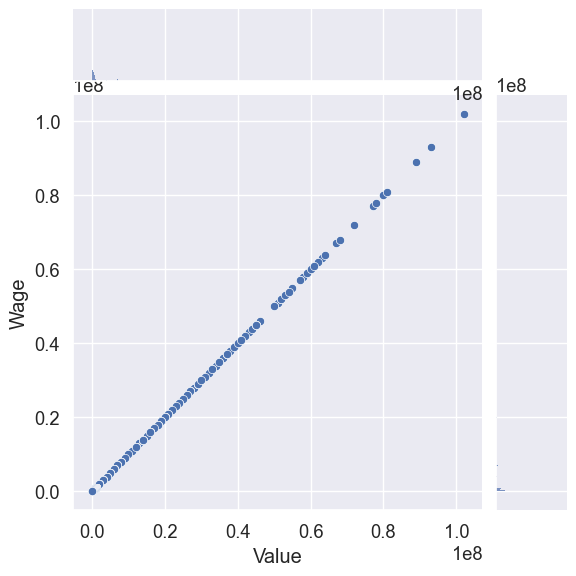

In [47]:
sns.jointplot(data=df,x='Value',y='Wage')
plt.show()

### 7 - What is the most **Preffered Foot** for the players ?

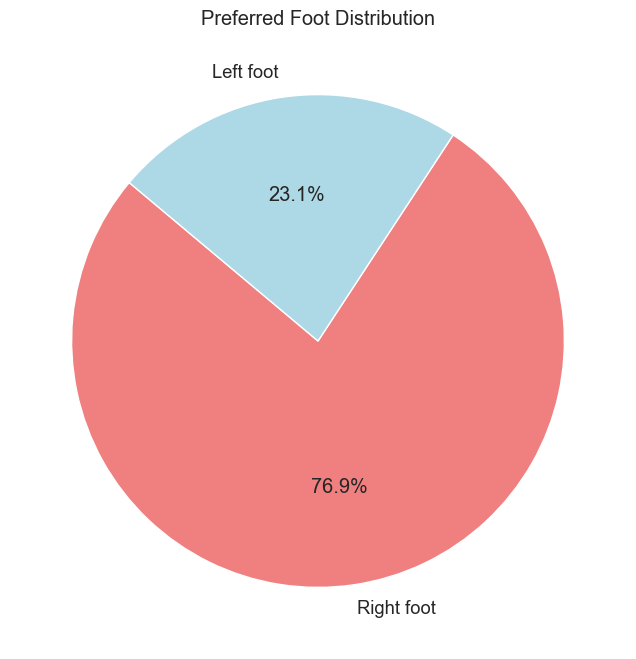

In [77]:
x = df['Preferred Foot'].value_counts()
y = ['Right foot', 'Left foot']
colors = ['lightcoral', 'lightblue']  # Specify colors here

plt.pie(x, labels=y, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Preferred Foot Distribution')
plt.show()

### 8 - What are the best **30 player**s evatuated by over all grade from the fifa?
we should choose from them our team 

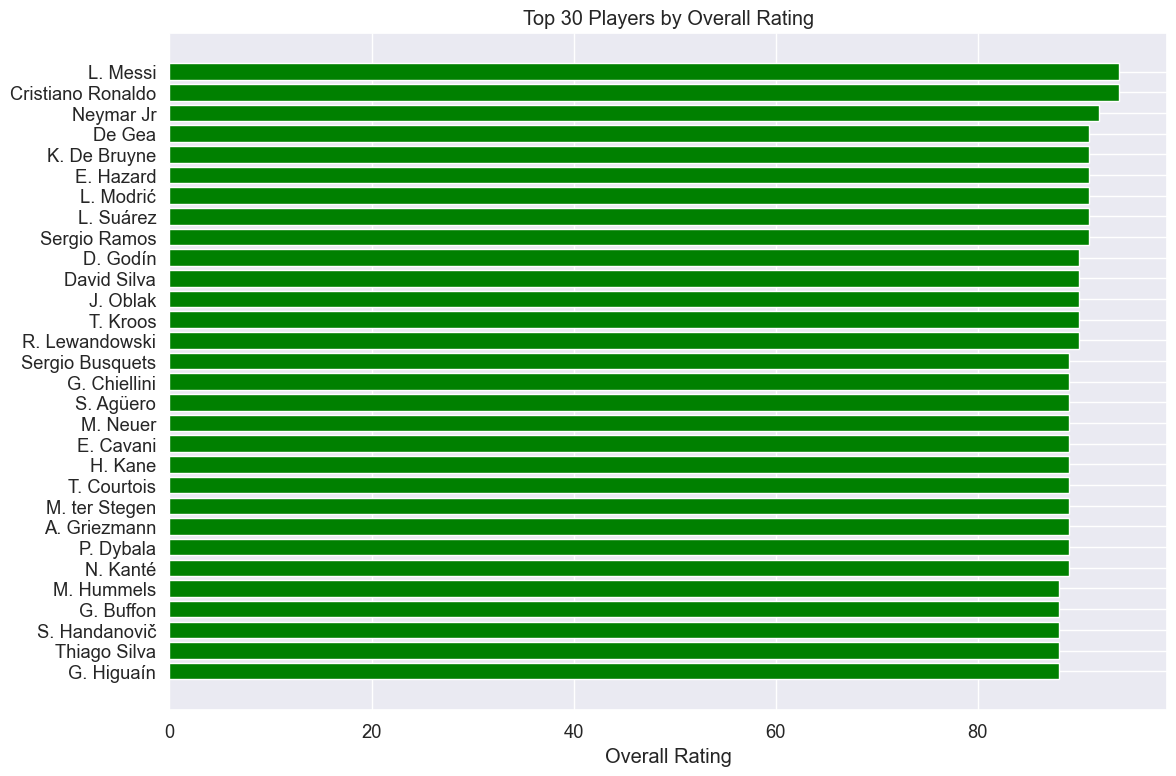

In [78]:
# Sort the dataset by 'Overall' rating in descending order and select the top 30 players
top_30_players = df.sort_values(by='Overall', ascending=False).head(30)

# Plot the top 30 players' overall ratings
plt.figure(figsize=(12, 8))
plt.barh(top_30_players['Name'], top_30_players['Overall'], color='green')
plt.xlabel('Overall Rating')
plt.title('Top 30 Players by Overall Rating')
plt.gca().invert_yaxis()  # To display the highest-rated player at the top
plt.tight_layout()

# Show the plot
plt.show()

### 9 - The best 10 goalkeepers players we can choose from them for our team: 

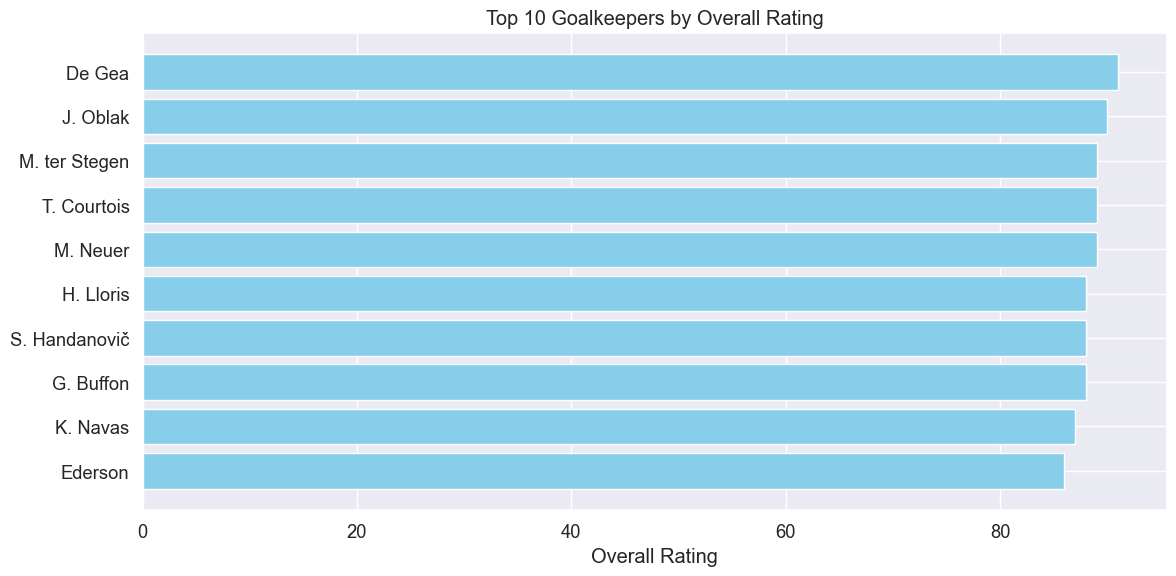

In [60]:
# Filter the dataset to include only goalkeepers
df_GK = df[df['Position'] == 'GK']

# Select the top 10 goalkeepers by overall rating
top_10_goalkeepers = df_GK.sort_values(by='Overall', ascending=False).head(10)

# Plot the top 10 goalkeepers by overall rating
plt.figure(figsize=(12, 6))
plt.barh(top_10_goalkeepers['Name'], top_10_goalkeepers['Overall'], color='skyblue')
plt.xlabel('Overall Rating')
plt.title('Top 10 Goalkeepers by Overall Rating')
plt.gca().invert_yaxis()  # To display the highest-rated goalkeeper at the top
plt.tight_layout()

# Show the plot
plt.show()

### 10 - Top 30 players wage ?

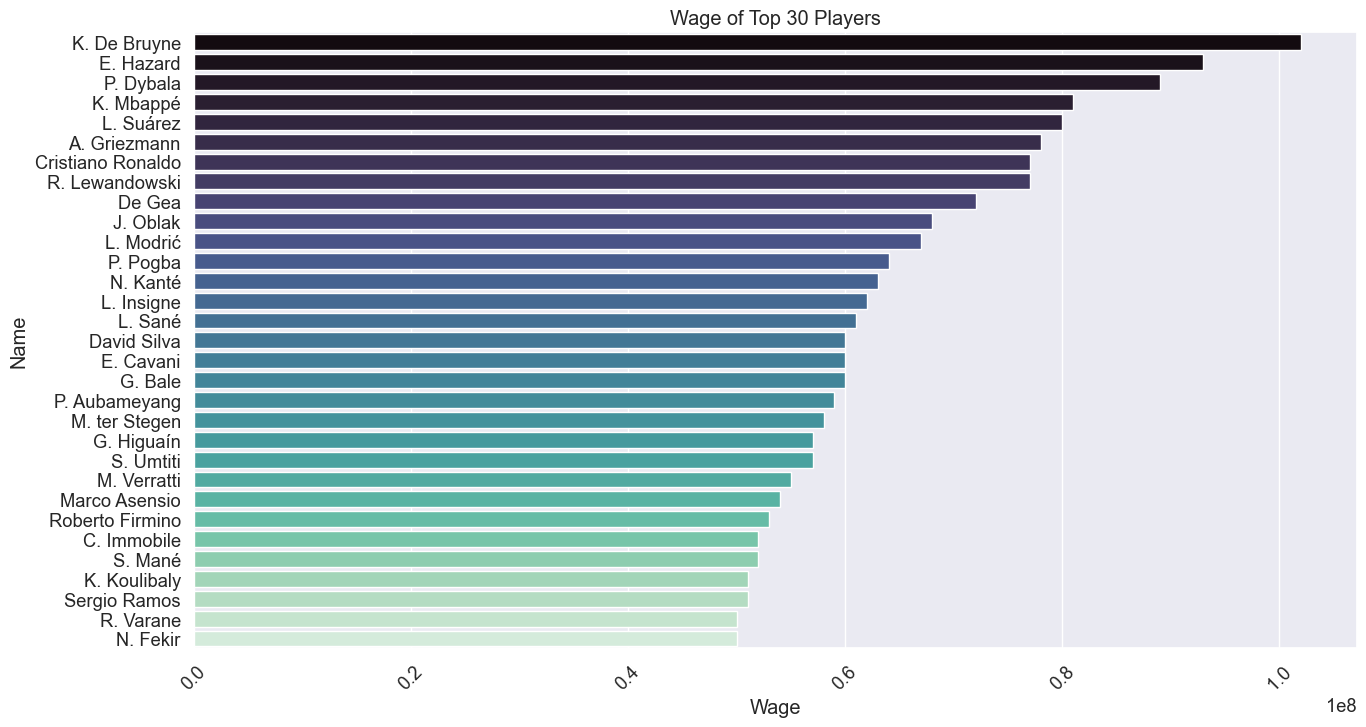

In [63]:
max_wageonly = df.groupby('Name')[['Wage']].max().sort_values(by='Wage',ascending = False).head(31)
plt.figure(figsize=[15,8])
sns.barplot(x=max_wageonly['Wage'],y=max_wageonly.index, palette='mako')
plt.title('Wage of Top 30 Players')
plt.xticks(rotation=45)
plt.savefig('profit.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='r')
plt.show()

### 11 - Total payment (Wage + released claused payment) for each player of top 30 players:

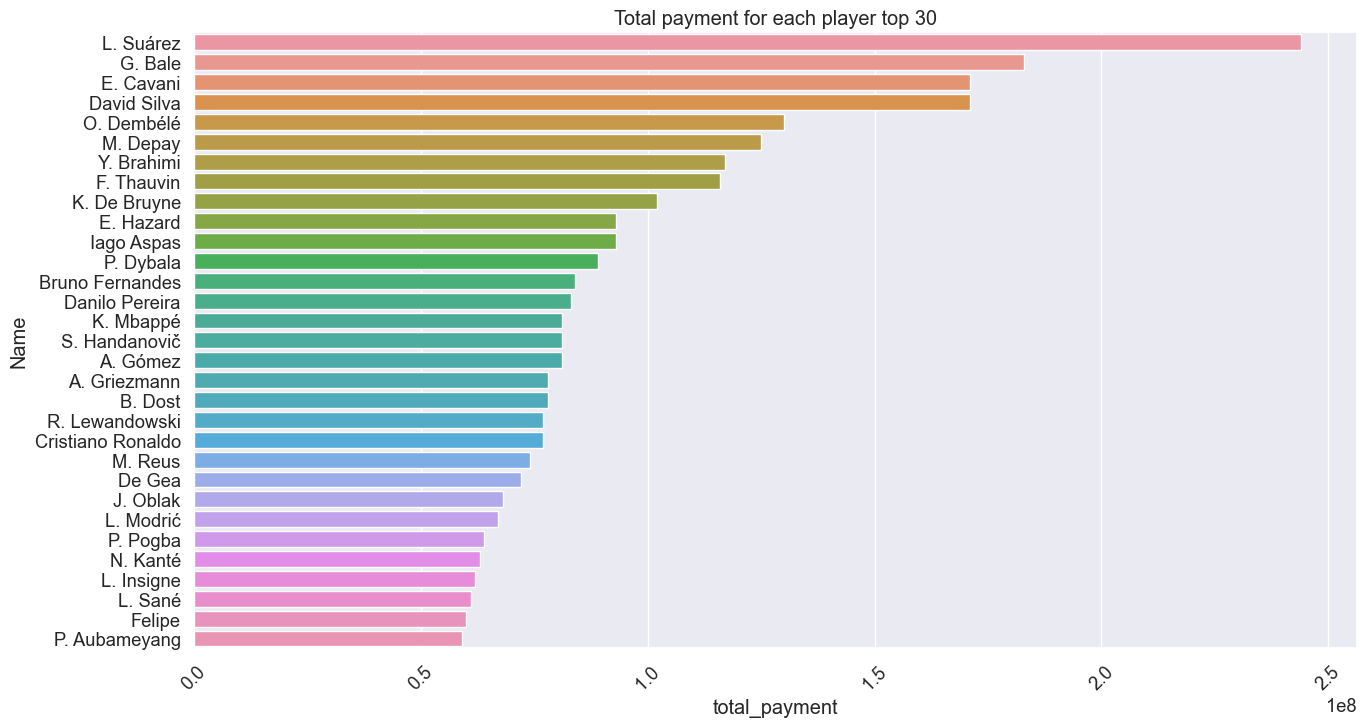

In [62]:
max_wage = df.groupby('Name')[['total_payment']].max().sort_values(by='total_payment',ascending = False).head(31)
plt.figure(figsize=[15,8])
sns.barplot(x=max_wage['total_payment'],y=max_wage.index)
plt.title('Total payment for each player top 30')
plt.xticks(rotation=45)
plt.savefig('profit.png',bbox_inches='tight',transparent=False,dpi=None, facecolor='w', edgecolor='b')
plt.show()

### 12 - Skill Moves Distribution

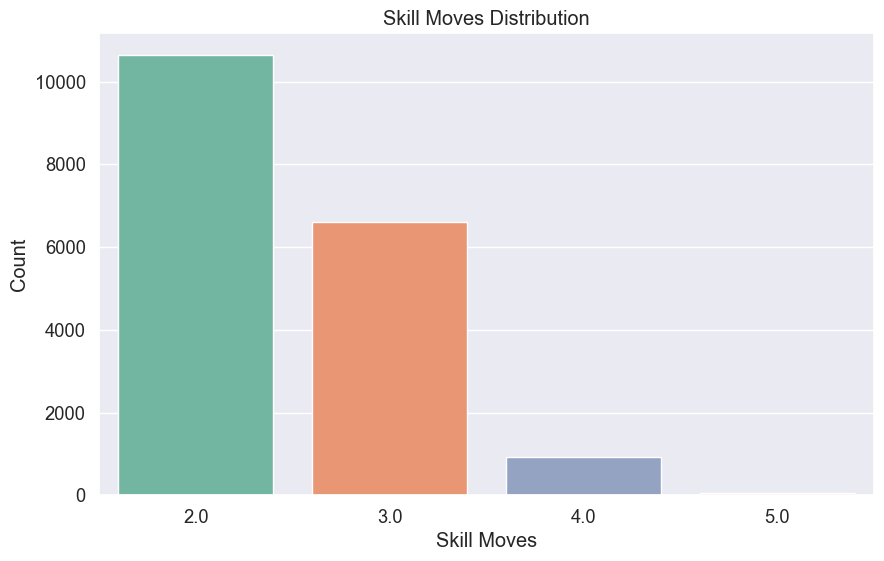

In [65]:
# Plot for the Skill Moves Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Skill Moves', palette='Set2')
plt.title('Skill Moves Distribution')
plt.xlabel('Skill Moves')
plt.ylabel('Count')
plt.show()

### 13 - Top 10 Defenders

<Figure size 1000x600 with 0 Axes>

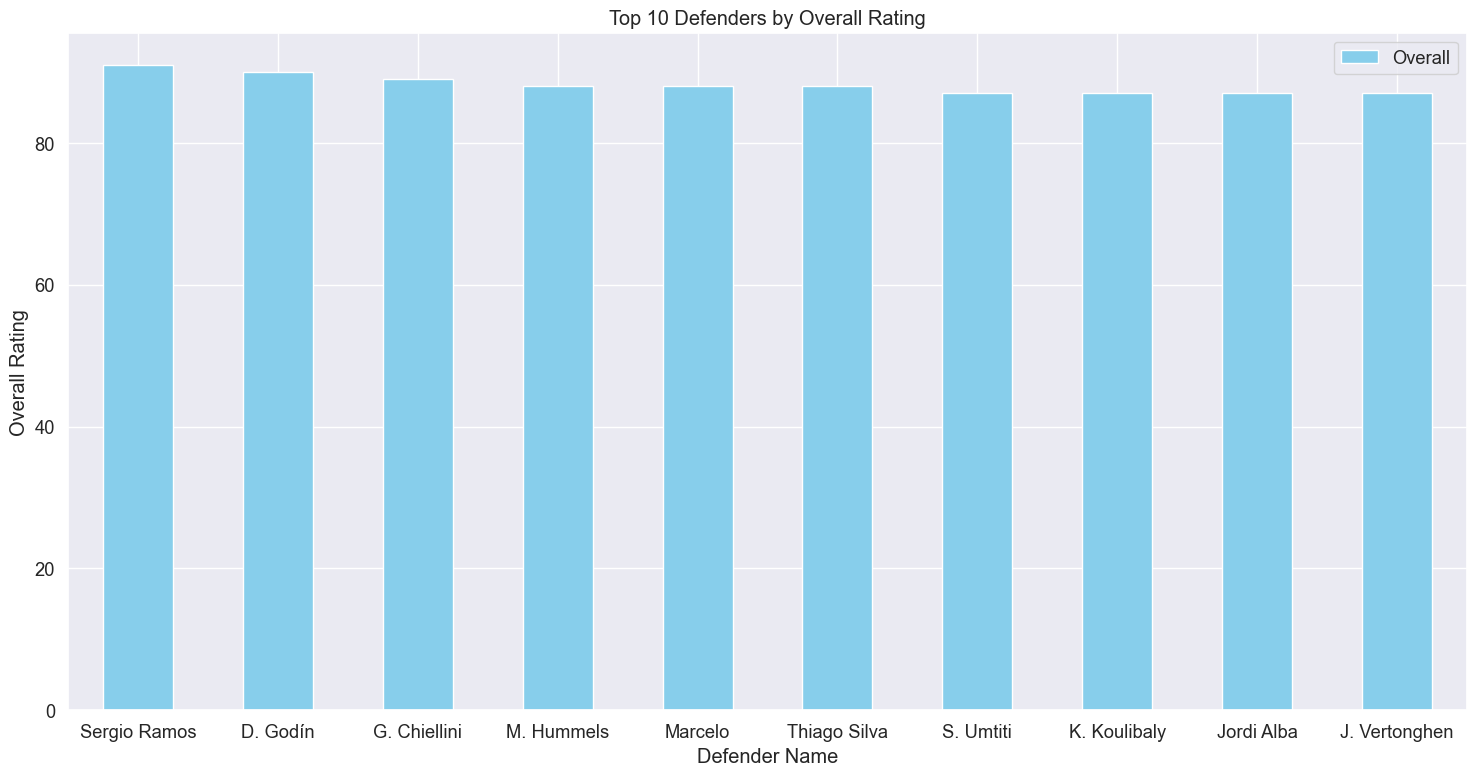

In [70]:
# Top 10 Defenders
top_2_defenders = df[df['Position'].str.contains('CB|RB|LB')].sort_values(by='Overall', ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_2_defenders.plot(kind='bar', x='Name', y='Overall', color='skyblue')
plt.title('Top 10 Defenders by Overall Rating')
plt.xlabel('Defender Name')
plt.ylabel('Overall Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 14 - Top 2 Strikers

<Figure size 1000x600 with 0 Axes>

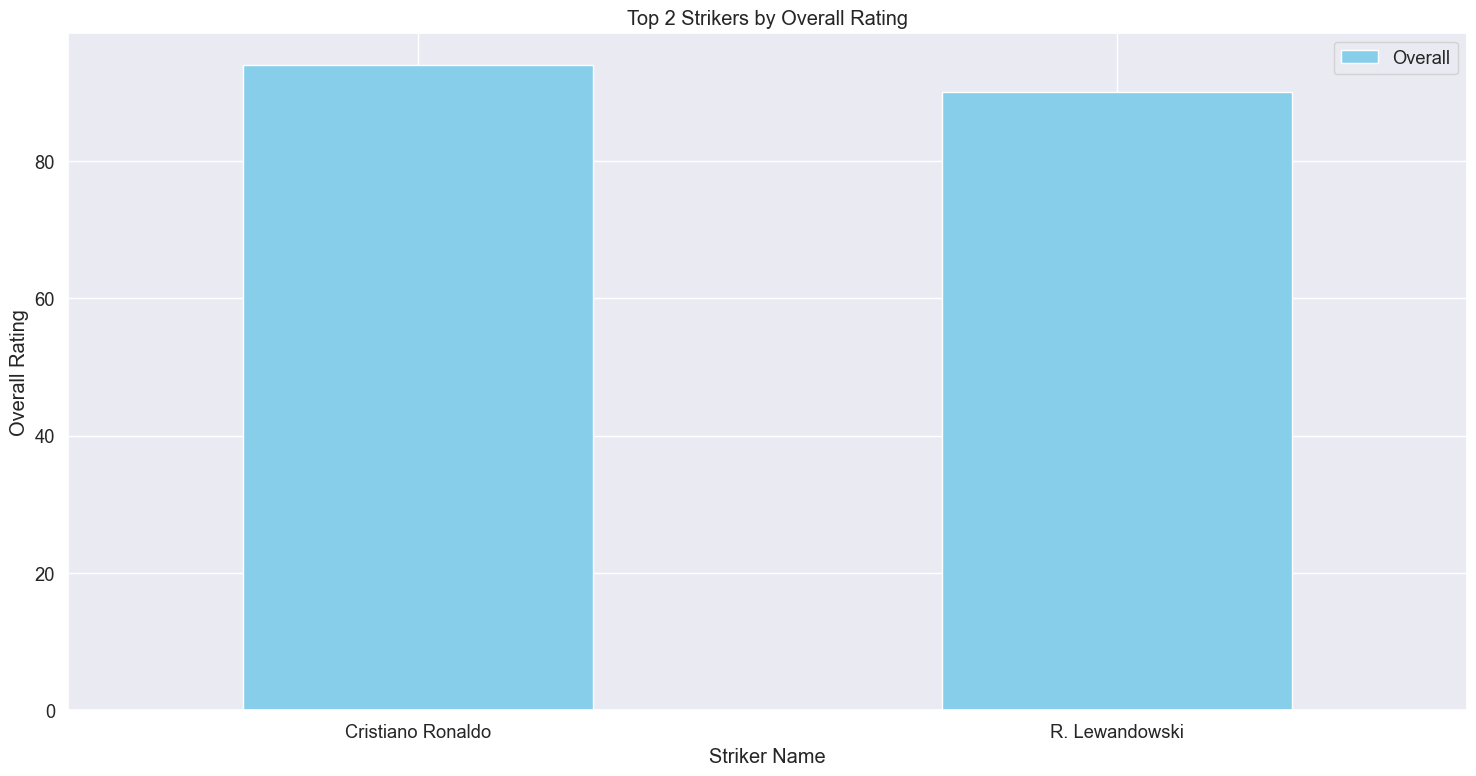

In [74]:
# Top 2 Strikers
top_2_strikers = df[df['Position'].str.contains('ST|CF')].sort_values(by='Overall', ascending=False).head(2)
plt.figure(figsize=(10, 6))
top_2_strikers.plot(kind='bar', x='Name', y='Overall', color='skyblue')
plt.title('Top 2 Strikers by Overall Rating')
plt.xlabel('Striker Name')
plt.ylabel('Overall Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 15 - Most Valuable Players

<Figure size 1000x600 with 0 Axes>

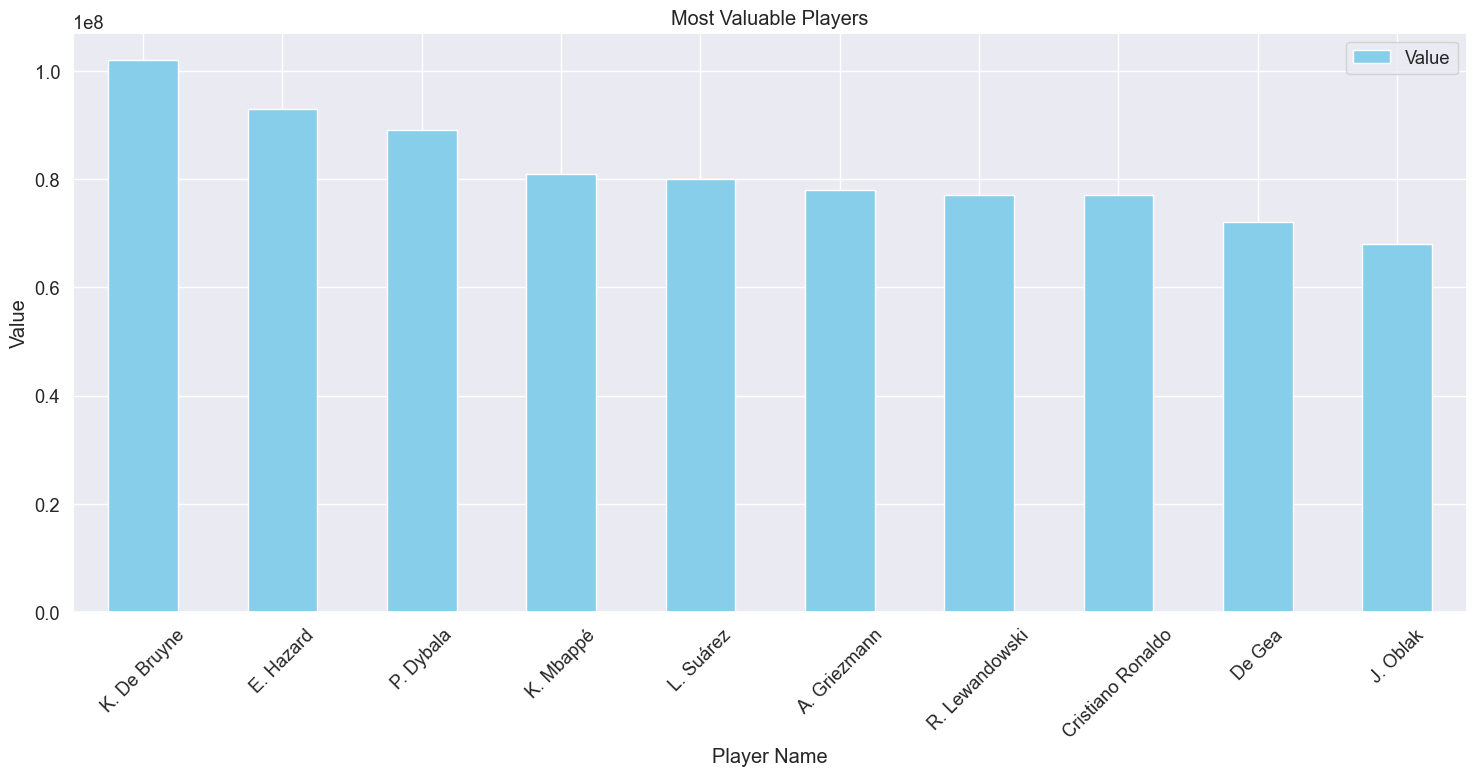

In [75]:
# Most Valuable players
most_valuable_players = df.sort_values(by='Value', ascending=False).head(10)
plt.figure(figsize=(10, 6))
most_valuable_players.plot(kind='bar', x='Name', y='Value', color='skyblue')
plt.title('Most Valuable Players')
plt.xlabel('Player Name')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p style="background-color:#F1C40F;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #F1C40F;">Thank you😄!!!!!!</p>